<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Support_vector_machines_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%whos #checking variables in memory

%reset -f #resetting memory


No variables match your requested type.
Don't know how to reset  #resetting, please run `%reset?` for details
Don't know how to reset  memory, please run `%reset?` for details


#Support Vector Machine

##Objective

In this checkpoint, we are going to work on the 'Electric Vehicle Data' dataset that was provided by Kaggle as part of the Electric Vehicle Price Prediction competition.

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?”

[➡️ Dataset link](https://i.imgur.com/IpuCW3s.jpg)


**Instructions**

Import you data and perform basic data exploration phase
1. Display general information about the dataset
  >Create a pandas profiling reports to gain insights into the dataset

  >Handle Missing and corrupted values

  >Remove duplicates, if they exist

  >Handle outliers, if they exist

  >Encode categorical features

2. Select your target variable and the features
3. Split your dataset to training and test sets
4. Build and train an SVM model on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
6. Discuss with your cohort alternative ways to improve your model performance



#1.0 Data Importation and Data Exploration

##1.1 Data import and Library

In [ ]:
# Create a pandas profiling report
!pip install pandas-profiling #install Ydata Profiling
import ydata_profiling as ydp # Import the Ydata_profiling library that have been installed
import profile # Imports profile for creating html or notebook from ydata_profiling results
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ec432bcd6c3de2dc5ca772b016e892aa252a25f5d65d0fd603ad09ccbbb7c12e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

##1.2 importing the dataset

In [ ]:
#importing Pandas
import pandas as pd
data = pd.read_csv('/content/Electric_cars_dataset.csv')

#2.0 Data Explorationa and Preparation

## 2.1 Data Exploration

#### 2.2.1 Understanding the datatype and structure of the dataset

In [ ]:
# Display general information about the dataset
print(data.info())

#overview of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


#### 2.2.2 Data exploration using Pandas Profiling

In [ ]:
#creating pandas profiling
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile

#### 2.2.3 Checking for missing values

From the pandas profiling result, there are over 1000 missing cells

In [ ]:
#Finding out where the missing values are
data.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

#### 2.2.4 Checking for duplicate row

In [ ]:
#duplicate row
data.duplicated().sum()

42179

#### 2.2.4 Checking for Unique values

In [ ]:
#Checking for the number of unique value in each column
data.nunique()

ID                                                   64353
VIN (1-10)                                            5644
County                                                 139
City                                                   544
State                                                   38
ZIP Code                                               678
Model Year                                              19
Make                                                    34
Model                                                  107
Electric Vehicle Type                                    2
Clean Alternative Fuel Vehicle (CAFV) Eligibility        3
Electric Range                                          98
Base MSRP                                               37
Legislative District                                    50
DOL Vehicle ID                                       64353
Vehicle Location                                       668
Electric Utility                                        

## 2.2 Data Cleaning

#### 2.2.1 Selecting relevants features

In [ ]:
#Selecting relevant features
data = data.loc[:,['Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Range', 'Base MSRP',
       'Expected Price ($1k)']]

#rename a column
data.rename(columns = {'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility', 'Electric Vehicle Type': 'EV Type'}, inplace = True)


#### 2.2.2 Excluding all the null value in the dataset

In [ ]:
#removing all the null value in the dataset
data = data.dropna(axis=0, how = 'any')
print(f"Missing value:\n{data.isnull().sum()}\n")
print(f"unique value:\n{data.nunique()}\n")
print(f"data types:\n{data.dtypes}")

Missing value:
Model Year              0
Make                    0
Model                   0
EV Type                 0
CAFV Eligibility        0
Electric Range          0
Base MSRP               0
Expected Price ($1k)    0
dtype: int64

unique value:
Model Year              12
Make                    13
Model                   22
EV Type                  2
CAFV Eligibility         3
Electric Range          49
Base MSRP                1
Expected Price ($1k)    80
dtype: int64

data types:
Model Year                int64
Make                      int64
Model                     int64
EV Type                   int64
CAFV Eligibility          int64
Electric Range            int64
Base MSRP                 int64
Expected Price ($1k)    float64
dtype: object


#### 2.2.3 Changing datatypes and Encoding categorical variables

In [ ]:
#converting the year column from float to integer
data['Model Year'] = data['Model Year'].astype(int)
data['Expected Price ($1k)'] = data['Expected Price ($1k)'].astype(float)
data['Model Year'].dtypes

dtype('int64')

In [ ]:
#Encoding catergorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['CAFV Eligibility'] = le.fit_transform(data['CAFV Eligibility'])
data['Make'] = le.fit_transform(data['Make'])
data['Model'] = le.fit_transform(data['Model'])
data['EV Type'] = le.fit_transform(data['EV Type'])


#### 2.2.4 Checking and removing outliers from the dataset

<Axes: >

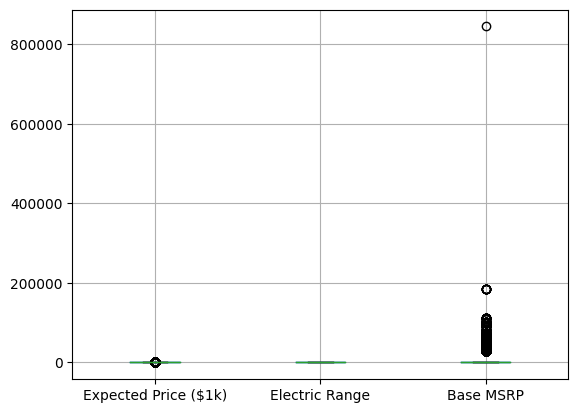

In [ ]:
data.boxplot(['Expected Price ($1k)', 'Electric Range', 'Base MSRP'])

Original dataframe shape: (42306, 8)
Cleaned dataframe shape: (42306, 8)


<Axes: >

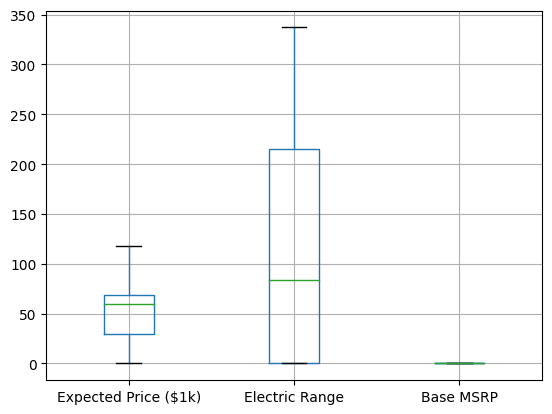

In [ ]:
#Using interquatile range to remove outliers from the dataset
#Find the Q1, Q3, and IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the original and cleaned dataframe
print("Original dataframe shape:", data.shape)
print("Cleaned dataframe shape:", data.shape)

data.boxplot(['Expected Price ($1k)', 'Electric Range', 'Base MSRP'])

#### 2.3 Data summary after cleaning

In [ ]:
#statisitical summary of data
data.describe()

,Model Year,Make,Model,EV Type,CAFV Eligibility,Electric Range,Base MSRP,Expected Price ($1k)
count,42306.000000,42306.000000,42306.000000,42306.000000,42306.000000,42306.000000,42306.0,42306.000000
mean,2018.549827,24.324729,56.981752,0.086040,0.385595,123.192195,0.0,52.295612
std,2.633584,6.521625,4.322590,0.280426,0.564162,109.689433,0.0,22.406009
min,2011.000000,3.000000,43.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,22.000000,53.000000,0.000000,0.000000,0.000000,0.0,29.998000
50%,2019.000000,28.000000,57.000000,0.000000,0.000000,84.000000,0.0,60.000000
75%,2021.000000,28.000000,60.000000,0.000000,1.000000,215.000000,0.0,69.000000
max,2022.000000,31.000000,69.000000,1.000000,2.000000,337.000000,0.0,117.400000


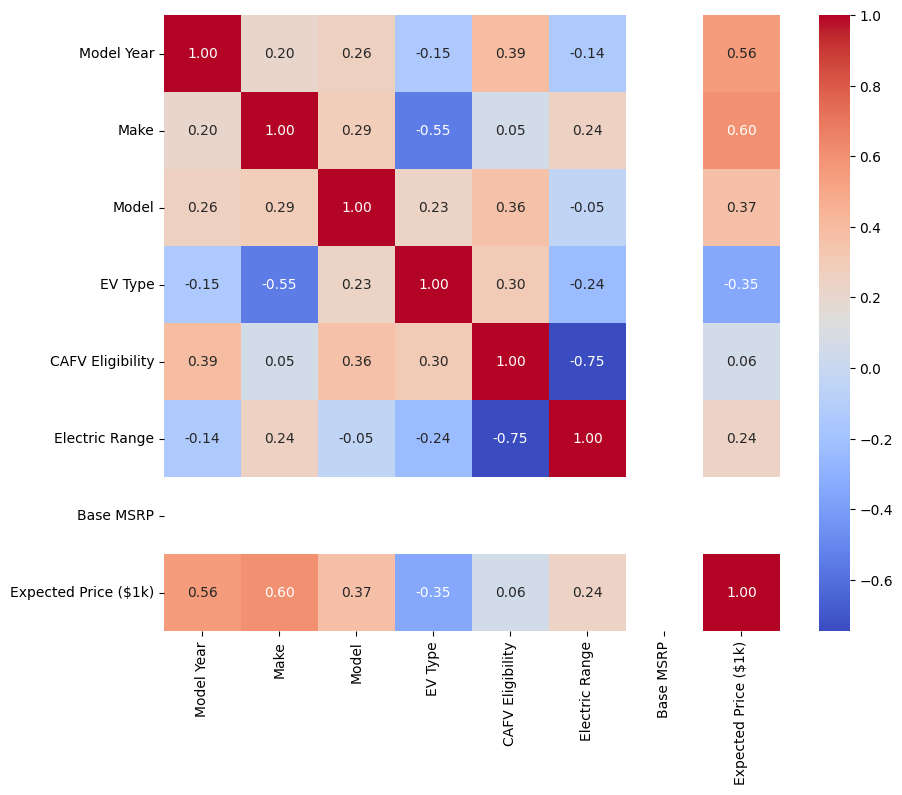

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

#3.0 Support Vector Machine

In [ ]:
# Identify your target variable and features
X = data.drop(["Expected Price ($1k)", "Base MSRP", "EV Type", "Electric Range"], axis=1)
y = data["Expected Price ($1k)"]

In [ ]:
#Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Build and Train SVM Model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Other relevant evaluation metrics based on your problem


Mean Squared Error: 342.7130944099634


#4.0 Improving the model and evaluating it

##4.1 Improving the model using optimal gamma and C using and linear kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 0.01]}

# Create SVR model
svr_model = SVR(kernel='linear')  # You can also try 'linear' for linear kernel

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test)

# Assess the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale'}
Mean Squared Error: 339.86161183465396


##4.2 Improving the model using optimal gamma and C using and rbf kernel

In [ ]:
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 0.01]}

# Create SVR model
svr_model = SVR(kernel='rbf')  # You can also try 'linear' for linear kernel

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test)

# Assess the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'C': 10, 'gamma': 'auto'}
Mean Squared Error: 1.107831394239491


## 4.3 Evaluating the model using residual gragh

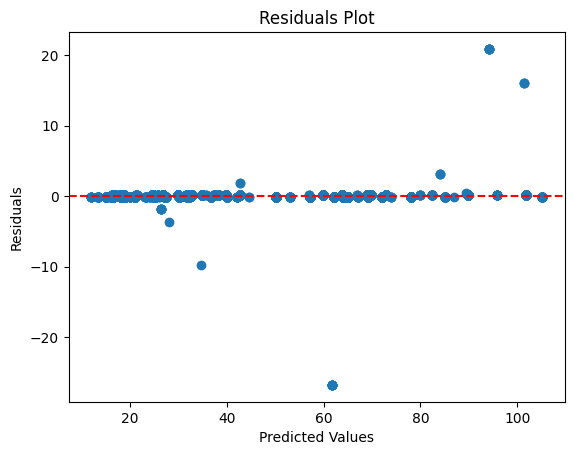

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined
residuals = y_test - y_pred

# Residuals Plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

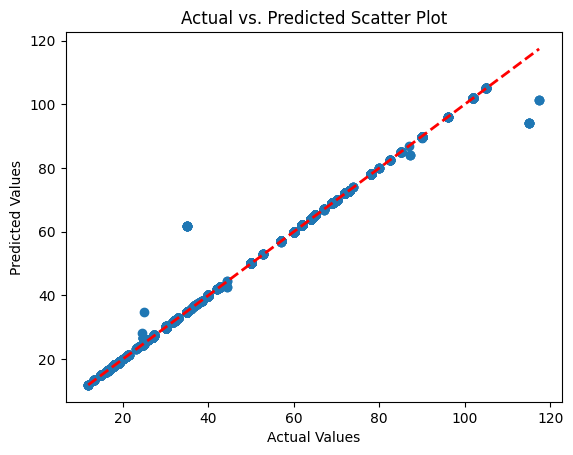

In [ ]:
# Actual vs. Predicted Scatter Plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#5.0 Conclusion

The Support Vector Regression (SVR) model was initially implemented with a linear kernel, resulting in a high Mean Squared Error (MSE) of 342. To improve the model’s performance, hyperparameter tuning was conducted using a parameter grid search for both linear and Radial Basis Function (RBF) kernels.

When fine-tuned with a linear kernel (gamma = scale and C = 0.1), the MSE slightly decreased to 339.86. However, a significant improvement was observed when the model was fine-tuned with an RBF kernel (gamma = auto and C = 10), reducing the MSE to 1.1.

The residual chart, which plots the difference between the observed and predicted values, shows that most points are concentrated around the zero line, indicating a good fit. However, a few outliers are present, suggesting some predictions deviated significantly from the actual values.

Some possible ways to better impprove the model include:

>Using cross-validation to evaluate the model performance on different subsets of the data and reduce the risk of overfitting or underfitting.

>Comparing different kernels such as polynomial or sigmoid to see if they can improve the model accuracy or generalization.

>Exploring other features that may be relevant for predicting the expected price of electric vehicles, such as battery capacity, charging time, or environmental impact.